# insurance expense prediction using linear regression

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [3]:
ins=pd.read_csv("insurance.csv")
ins.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
ins.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

<AxesSubplot:xlabel='age', ylabel='expenses'>

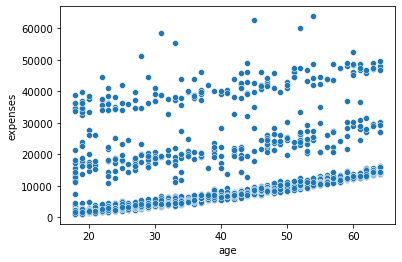

In [6]:
sns.scatterplot(data=ins,x='age',y='expenses')

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

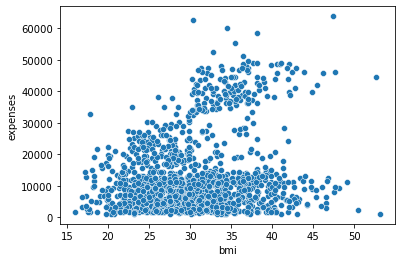

In [8]:
sns.scatterplot(data=ins,x='bmi',y='expenses')

<AxesSubplot:>

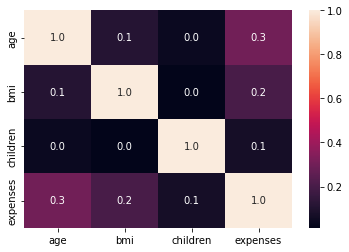

In [9]:
sns.heatmap(ins.corr(),annot=True,fmt="0.1f")

In [10]:
ins.select_dtypes("object")

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [11]:
#encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ins["sex"]=le.fit_transform(ins["sex"])
ins["smoker"]=le.fit_transform(ins["smoker"])
ins["region"]=le.fit_transform(ins["region"])
ins.select_dtypes("object")

""
0
1
2
3
4
...
1333
1334
1335
1336


In [13]:
ins.select_dtypes("number")

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1,10600.55
1334,18,0,31.9,0,0,0,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,3,2007.95


In [14]:
X=ins.drop("expenses",axis=1)
Y=ins["expenses"]

In [15]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,3
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,1
4,32,1,28.9,0,0,1


In [16]:
Y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split
x1, x2, y1, y2=train_test_split(X,Y,test_size=0.2,random_state=2)

In [19]:
x2.head()

,age,sex,bmi,children,smoker,region
17,23,1,23.8,0,0,0
1091,55,0,29.8,0,0,0
273,50,1,27.5,1,0,0
270,18,1,29.4,1,0,2
874,44,1,21.9,3,0,0


In [20]:
x1.head()

,age,sex,bmi,children,smoker,region
882,21,0,22.1,0,0,0
505,37,1,30.9,3,0,1
798,58,0,33.1,0,0,3
792,22,0,23.2,0,0,0
201,48,0,32.2,1,0,2


In [21]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x1,y1)

LinearRegression()

In [22]:
lr.score(x2,y2)*100

74.45469182584412

In [23]:
lr.coef_

array([  251.35879408,   -35.63708495,   330.82990735,   589.23601981,
       23904.71270427,  -323.66576288])

In [24]:
lr.intercept_

-11749.437413039712

In [25]:
from sklearn.preprocessing import StandardScaler  #feature scaling,#standardization
sc=StandardScaler()
x1=sc.fit_transform(x1)
x2=sc.transform(x2)

In [26]:
x2

array([[-1.19184495,  0.98147988, -1.14222157, -0.93004238, -0.50729114,
        -1.3755987 ],
       [ 1.11974285, -1.01886959, -0.14813716, -0.93004238, -0.50729114,
        -1.3755987 ],
       [ 0.75855726,  0.98147988, -0.52920285, -0.09937014, -0.50729114,
        -1.3755987 ],
       ...,
       [ 1.55316556, -1.01886959, -0.26411367, -0.93004238,  1.97125461,
        -0.47148899],
       [ 0.61408302,  0.98147988,  1.09446836,  0.7313021 , -0.50729114,
         0.43262072],
       [ 0.83079438,  0.98147988, -0.97654084,  0.7313021 ,  1.97125461,
        -0.47148899]])

In [ ]:
#normalisation

In [38]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
X_train=mms.fit_transform(x1)
X_test=mms.transform(x2)
print(X_train)

[[0.06521739 0.         0.14804469 0.         0.         0.        ]
 [0.41304348 1.         0.39385475 0.6        0.         0.33333333]
 [0.86956522 0.         0.45530726 0.         0.         1.        ]
 ...
 [0.93478261 1.         0.74301676 0.         0.         1.        ]
 [0.7173913  0.         0.25139665 0.2        0.         1.        ]
 [0.86956522 0.         0.43575419 0.2        0.         0.        ]]
